https://colab.research.google.com/drive/1UrIkIl-QrzMPqAY-4G9rl8pMy-OpKwjt#scrollTo=RFN7CuyrzqL1

В этом модуле мы узнаем,  как обучить простейшую модель машинного обучения - линейную регрессию. Разберёмся, как отобразить интуитивное представление на язык программирования.
Мы поговорим о том, как измерить качество обученной модели, а так же научимся правильно подготавливать фичи модели, чтобы добиваться более высокого качества решения.
В конце урока вы сможете решать интересные задачи: например, прогнозировать цену дома по его площади, используя язык программирования **Python**.

# Постановка ML задачи линейной регрессии

Впервые термин *регрессия* в статистике был использован английским исследователем Френсисом Гальтоном (1886) в  исследовании довольно простого вопроса: как связаны рост отца и рост сына? Было обнаружено, что в целом сыновья высоких отцов, оказались более высокими, чем сыновья отцов с низким ростом. Более интересным было то, что разброс в росте сыновей (по оси $Y$) был меньшим, чем разброс в росте отцов (по оси $X$), как видно на картинке:
![halton_lin_reg](https://248006.selcdn.ru/public/Data-science-4/img/halton_lin_reg.png)
Так проявлялась тенденция возвращения роста сыновей к среднему (regression to mediocrity), то есть «регресс». Когда говорим про регрессию в машинном обучении, то понимаем под этим модель, которая делает прогнозы с помощью "усреднения" входных данных. Подробнее о том, как именно проходит усреденения, мы поговорим в этом уроке.

Зачем же нам может понадобиться получать значение одной величины (целевой переменной) по значению других величин (фичей)? Рассмотрим на примере риэлторского агентства. У нас есть информация про дома

* площадь
* количество комнат жилых
* наличие гардеробной
* ...
* цена дома

К нам приходит клиент и хочет выставить свой дом на продажу за сумму $x=88$ млн. Наша задача – подсказать, насколько желаемая цена адекватна и соответствует дому, который предлагается. Мы хотим построить математическую модель, которая на вход принимает разные характеристики дома (например, площадь), а на выходе возвращает предсказанную цену. Такая модель должна "понимать", с какой силой  площадь (и все остальные параметры) влияют на цену дома.

Идея этого алгоритма очень проста – давайте для примера возьмём простой случай, когда у нас одна переменная – площадь дома (в машинном обучении эту переменную называют "фича"), обозначим её за $x$ и один целевой признак – цена дома, обозначим её за $y$. Как нам построить очень простую модель, которая предсказывает значение цены по значению площади?

Наши данные для анализа представлены в виде облака точек (на картинке простой пример, где "облако" – это всего 4 точки), мы хотим провести среди точек прямую линию, то есть представить наши данные в виде линейной зависимости $\hat{y} = a\cdot x + b$. Допустим для задачи "Предскажи стоимость дома по площади":

* $y$ - цена дома, которая нам известна
* $x$ - площадь дома
* $a$ - коэффициент, на который умножаем площадь
* $b$ - коэффициент, который называется "свободным членом"


Интуитивно понятно, что линия должна быть максимально возможно близка к каждой точке (оранжевая линия, например, лежит далеко от крайних точек а синяя линия более компромиссная – она стремится пройти как можно ближе к каждой точке.

![least_squares_learning](https://248006.selcdn.ru/public/Data-science-4/img/least_line.png)

Величина $\hat{y}$ называется *прогнозом* линейной регрессии. Чтобы получить прогноз, мы умножаем коэффициент $a$ на значение признака $x$ и добавляем свободный член $b$. Давайте получим уравнение этой "синей линии" по шагам.

**Шаг 1** Как же нам определить по входным данным идеальные коэффициенты $a$ и $b$? Давайте немного уйдём от школьных обозначений $a$ и $b$ к обозначениям $w_1$ и $w_0$, тогда формула приобретает следующий вид:
$$
y = w_1x + w_0\cdot1 = w_1x_1 + w_0x_0
$$

Что мы сделали? Ничего сложного. Кроме значения фичи $x_1$ ввели специальную фичу $x_0$, которая всегда равна единице. 

**Шаг 2** Теперь сделаем следущий шажок. У нас есть уравнение для одной точки, а на а картинке выше у нас четыре точки – то есть вместо одного уравнения мы можем написать четыре уравнения (верхний индекс – это номер точки в нашем датасете, от одного до 4):

$$
\left\{
\begin{array}{l}
y^1 = w_1x^1_1 + w_0x^1_0 \\
y^2 = w_1x^2_1 + w_0x^2_0 \\
y^3 = w_1x^3_1 + w_0x^3_0 \\
y^4 = w_1x^4_1 + w_0x^4_0 \\
\end{array}
\right.
$$

Заметьте, что координаты точек меняются, а вот коэффициенты $w_1, w_0$ присутствуют в каждом уравнении. Суть линейной регрессии как раз в том, чтобы определить наилучшие коэффициенты $w_1, w_0$ такие, чтобы все четыре уравнения решились (хотя бы приближенно). 

**Шаг 3** Перейдём в векторным обозначениям
$$
\left.
\begin{array}{l}
(w_1, w_0) = \overline{w} \\
(x_1, x_0) = \overline{x} \\
\end{array}
\right.
$$

Тогда для каждой точки нашего датасета сумму можно переписать в виде произведения двух векторов
$$
y^1 = \overline{x}^1\cdot\overline{w} \\
y^2 = \overline{x}^2\cdot\overline{w} \\
y^3 = \overline{x}^3\cdot\overline{w} \\
y^4 = \overline{x}^4\cdot\overline{w} \\
$$

**Шаг 4** Мы переписали каждую сумму в виде умножения векторов. А теперь для для удобства записи мы перейдем к матричному умножению (подробнее посмотрите на  [википедии](https://ru.wikipedia.org/wiki/Умножение_матриц)):

$$
Y = X\cdot\overline{w}
$$

Двумерный массив (в машинном обучении он называется *матрица*) $X$ содержит 4 строки (по числу обучающих объектов) и 2 столбца (по числу фичей) и называется матрицей объекты-признаки.

Очень круто! Мы по шагам свернули большую формулу из чётырех строчек в одну строку как же нам это поможет? Оказывается, чтобы решить нашу систему из пяти уравнений, математики вывели формулу, которая в векторно-матричном виде выглядит так:

$$
\overline{w} = \left(X^TX\right)^{-1}X^TY
$$

Выглядит немного сложно! Но на самом деле совсем не сложно, давайте разберёмся на конкретном примере.

**Пример** Пусть у нас есть набок точек. Наш набор точек – это данные по виллам в Калифорнии, где $x$ – это площадь дома (наша единственная фича), а $y$ – цена дома (наша целевая переменная).

$$
\left\{
\begin{array}{ll}
x_1=50, & y_1 = 10 \\
x_2=60, & y_2 = 30 \\
x_3=70, & y_3 = 40 \\
x_4=100, & y_4 = 50 \\
\end{array}
\right.
$$

Визуализируем наши точки:

/var/folders/th/dn5zc4dd3rz56c206fznc1th0000gn/T/ipykernel_34075/2887062899.py:5: MatplotlibDeprecationWarning: Passing the marker parameter of scatter() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.scatter([50, 60, 70, 100], [10, 30, 40, 50], 40, 'g', 'o', alpha=0.8)


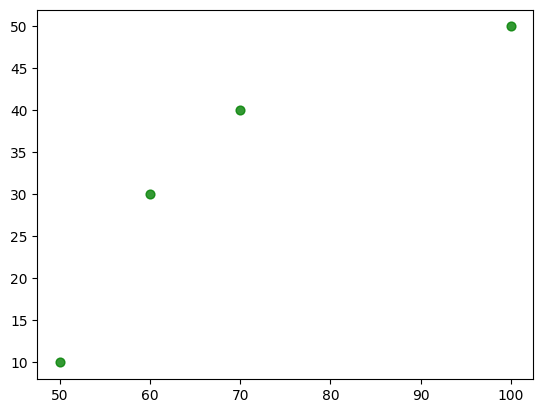

In [1]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.scatter([50, 60, 70, 100], [10, 30, 40, 50], 40, 'g', 'o', alpha=0.8)
plt.show()

In [2]:
import numpy as np

X = np.array([[1, 50],[1, 60],[1, 70],[1, 100]]) # Добавляем x0 = единичному вектору(тривиальная переменная)

X

array([[  1,  50],
       [  1,  60],
       [  1,  70],
       [  1, 100]])

In [3]:
Y = np.array([[10],[30],[40],[50]])

Y

array([[10],
       [30],
       [40],
       [50]])

Выписываем формулу по кусочкам. Сначала перемножим матрицу *объекты-признаки* саму на себя
$$
X^T\cdot X
$$

In [4]:
X_T_X = (X.T).dot(X)

X_T_X

array([[    4,   280],
       [  280, 21000]])

Теперь найдём обратную матрицу к ней. Тут вручную прогграммировать ничего не надо - для нахождения обратной матрицы уже есть готовая реализация
$$
\left(X^TX\right)^{-1}
$$

In [5]:
from numpy.linalg import inv

X_T_X_inverted = inv(X_T_X)

X_T_X_inverted

array([[ 3.75000000e+00, -5.00000000e-02],
       [-5.00000000e-02,  7.14285714e-04]])

Ну, осталось дописать формулу до конца
$$
\left(X^TX\right)^{-1}X^TY
$$

In [6]:
w = X_T_X_inverted.dot(X.T).dot(Y)

print("w_1=%.5f, w_2=%.3f" % (w[0][0],w[1][0]))

w_1=-17.50000, w_2=0.714


То есть наш набор из пяти точек прекрасно описывает прямая линия с уравнением $y = -17.5 + 0.714\cdot x$. Давайте проверим это графически.

In [7]:
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline

# задаём границы координатных осей
margin = 10
X_min = 20
X_max = X[:,1].max()+margin

# набор точек, чтобы нарисовать прямую
X_support = np.linspace(X_min, X_max, num=100)
# предсказания нашей модели
Y_model = w[0][0] + w[1][0]*X_support

/var/folders/th/dn5zc4dd3rz56c206fznc1th0000gn/T/ipykernel_34075/2659210289.py:5: MatplotlibDeprecationWarning: Passing the marker parameter of scatter() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.scatter(X[:,1], Y[:,0], 40, 'g', 'o', alpha=0.8)


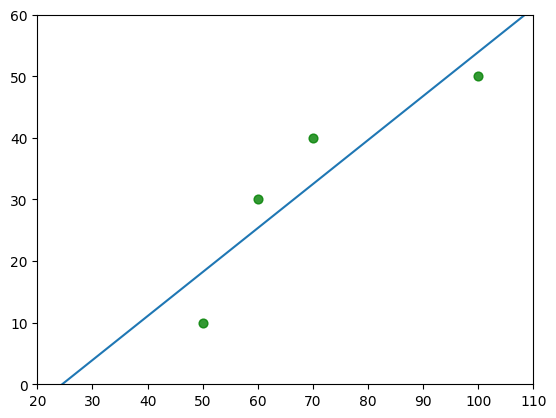

In [8]:
# настройка графика 
plt.xlim(X_min, X_max)
plt.ylim(0, Y[:,0].max() + margin)
# рисуем исходные точки
plt.scatter(X[:,1], Y[:,0], 40, 'g', 'o', alpha=0.8)
# предсказания модели
plt.plot(X_support, Y_model)

plt.show()